Goal: load and visualize SST data available [on this site](https://www.esrl.noaa.gov/psd/data/gridded/data.noaa.oisst.v2.html). 


Mix of different source: 
- https://datascience-enthusiast.com/Python/sphere_ntcdf.html
- https://geonetcast.wordpress.com/gnc-a-product-manipulation-tutorials/
- https://medium.com/@egalytska/nice-and-quick-simple-plotting-with-python-f5722bffd21c
- https://podaac-www.jpl.nasa.gov/forum/viewtopic.php?f=83&t=255


# With netCDF4 and basemap

- netCDF4 is used to read the data (see below, you can use scipy instead)
- basemap to plot the earth map

In [2]:
conda install netCDF4


Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /Users/orianepagani/opt/anaconda3

  added / updated specs:
    - netcdf4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cftime-1.0.4.2             |   py37h1d22016_0         238 KB
    conda-4.8.2                |           py37_0         2.8 MB
    hdf4-4.2.13                |       h39711bb_2         682 KB
    libnetcdf-4.6.1            |       hd5207e6_2         777 KB
    netcdf4-1.4.2              |   py37h13743db_0         401 KB
    ------------------------------------------------------------
                                           Total:         4.9 MB

The following NEW packages will be INSTALLED:

  cftime     

In [3]:
conda install basemap

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /Users/orianepagani/opt/anaconda3

  added / updated specs:
    - basemap


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    basemap-1.2.0              |   py37h0acbc05_0        14.4 MB
    geos-3.6.2                 |       h5470d99_2         1.1 MB
    proj4-5.2.0                |       h0a44026_1         6.6 MB
    pyproj-1.9.6               |   py37h9c430a6_0          58 KB
    pyshp-2.1.0                |             py_0          34 KB
    ------------------------------------------------------------
                                           Total:        22.2 MB

The following NEW packages will be INSTALLED:

  basemap    

In [9]:
import numpy as np
import netCDF4 as net
import matplotlib.pyplot as plt
#import basemap as bm

from netCDF4 import Dataset


In [11]:
import mpl_toolkits.basemap as bm

KeyError: 'PROJ_LIB'

In [16]:
# Open the file
Dset = Dataset("/Users/orianepagani/Desktop/ESPCI/3A/DL/Projet_Océan/sst.mnmean.nc", "r", format ="NETCDF4")
# Look at the variables we have
print(Dset.variables)


OrderedDict([('lat', <class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    units: degrees_north
    long_name: Latitude
    actual_range: [ 89.5 -89.5]
    standard_name: latitude
    axis: Y
    coordinate_defines: center
unlimited dimensions: 
current shape = (180,)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('lon', <class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    units: degrees_east
    long_name: Longitude
    actual_range: [  0.5 359.5]
    standard_name: longitude
    axis: X
    coordinate_defines: center
unlimited dimensions: 
current shape = (360,)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('sst', <class 'netCDF4._netCDF4.Variable'>
int16 sst(time, lat, lon)
    long_name: Monthly Mean of Sea Surface Temperature
    unpacked_valid_range: [-5. 40.]
    actual_range: [-1.7999996 35.56862  ]
    units: degC
    add_offset: 0.0
    scale_factor: 0.01
    missing_value: 32767
    precision: 2
    least_significant_digit: 2
    v

In [23]:
# the data 
sst = Dset.variables["sst"][:]
print(type(sst), sst.shape)
print(sst.data) #renvoie que les mêmes données 
print('-------')
print(sst.mask) #renvoie False 
print('-----')
print(np.ma.getdata(sst))
print('-----')
print(np.ma.getmask(sst)) #renvoie False

<class 'numpy.ma.core.MaskedArray'> (459, 180, 360)
[[[-1.79 -1.79 -1.79 ... -1.79 -1.79 -1.79]
  [-1.79 -1.79 -1.79 ... -1.79 -1.79 -1.79]
  [-1.77 -1.77 -1.77 ... -1.78 -1.78 -1.78]
  ...
  [-1.79 -1.79 -1.79 ... -1.79 -1.79 -1.79]
  [-1.79 -1.79 -1.79 ... -1.79 -1.79 -1.79]
  [-1.79 -1.79 -1.79 ... -1.79 -1.79 -1.79]]

 [[-1.79 -1.79 -1.79 ... -1.79 -1.79 -1.79]
  [-1.79 -1.79 -1.79 ... -1.79 -1.79 -1.79]
  [-1.78 -1.78 -1.78 ... -1.79 -1.79 -1.79]
  ...
  [-1.79 -1.79 -1.79 ... -1.79 -1.79 -1.79]
  [-1.79 -1.79 -1.79 ... -1.79 -1.79 -1.79]
  [-1.79 -1.79 -1.79 ... -1.79 -1.79 -1.79]]

 [[-1.79 -1.79 -1.79 ... -1.79 -1.79 -1.79]
  [-1.79 -1.79 -1.79 ... -1.79 -1.79 -1.79]
  [-1.79 -1.79 -1.79 ... -1.79 -1.79 -1.79]
  ...
  [-1.79 -1.79 -1.79 ... -1.79 -1.79 -1.79]
  [-1.79 -1.79 -1.79 ... -1.79 -1.79 -1.79]
  [-1.79 -1.79 -1.79 ... -1.79 -1.79 -1.79]]

 ...

 [[-1.79 -1.79 -1.79 ... -1.79 -1.79 -1.79]
  [-1.79 -1.79 -1.79 ... -1.79 -1.79 -1.79]
  [-1.79 -1.79 -1.79 ... -1.79 -1.79 -

In [140]:
# latitude and longitude
lon_scale = Dset.variables["lon"][:]
lon_units = Dset.variables["lon"].units
print("lon: ", type(lon_scale),lon_scale.shape ,type(lon_units))
print('   from ', lon_scale[0], "  to ",lon_scale[-1] )
lat_scale = Dset.variables["lat"][:]
lat_units = Dset.variables["lat"].units
print("lat: ", type(lat_scale),lat_scale.shape ,type(lat_units))
print('   from ', lat_scale[0], "  to ",lat_scale[-1] )


lon:  <class 'numpy.ndarray'> (360,) <class 'str'>
   from  0.5   to  359.5
lat:  <class 'numpy.ndarray'> (180,) <class 'str'>
   from  89.5   to  -89.5


In [141]:
lon_range = Dset.variables["lon"].actual_range
lon_min , lon_max = lon_range
lat_min , lat_max = Dset.variables["lat"].actual_range
print (lon_range, Dset.variables["lat"].actual_range )


[   0.5  359.5] [ 89.5 -89.5]


/Users/allauzen/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/allauzen/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/allauzen/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


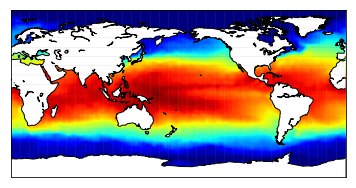

In [142]:
# plot the earth 
bmap = bm.Basemap(projection = 'cyl', 
                  llcrnrlat = -90.0, 
                  llcrnrlon = 0.0,  
                  urcrnrlat = 90.0, 
                  urcrnrlon = 360.0)
bmap.drawcoastlines()
bmap.drawparallels(np.arange(0, 90.0, 10.0), linewidth=0.1, color='k')
bmap.drawmeridians(np.arange(0.0, 360.0, 10.0), linewidth=0.1, color='white')
bmap.fillcontinents(color = 'white') 
## now we can plot the data on the map
# Note: we need to flip one axis
# To find the good one see an extract from the web site
# https://www.esrl.noaa.gov/psd/data/gridded/data.noaa.oisst.v2.html
# and the download : 193.49.170.29.64.8.48.1.png
bmap.imshow(sst[0,::-1,:], origin='lower',  cmap='jet')

plt.show()

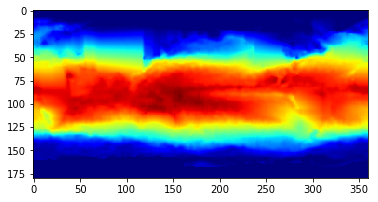

In [143]:
# the raw data without the map 
# See here we do not flip one axis because it's already 
# in the good direction
plt.imshow(sst[0,:,:],cmap='jet')
plt.show()

# With only scipy 

The code below comes from some link on the web, but I don't understand how the data are decoded from the netcdf file. So at the end, I do not recommend to use it ! 

In [160]:
from scipy.io import netcdf
nc = netcdf.netcdf_file("/Users/allauzen/data/sst/sst.wkmean.1981-1989.nc",'r')
# Acces to the variable list 
print(nc.variables)


OrderedDict([('lat', <scipy.io.netcdf.netcdf_variable object at 0xb1e8622e8>), ('lon', <scipy.io.netcdf.netcdf_variable object at 0xb1e8629e8>), ('time', <scipy.io.netcdf.netcdf_variable object at 0xb1fba7278>), ('time_bnds', <scipy.io.netcdf.netcdf_variable object at 0xb1fba7198>), ('sst', <scipy.io.netcdf.netcdf_variable object at 0xb1fba7208>)])


In [127]:

# Get the time array 
print("---- Time -----")
time = nc.variables['time']
print(type(time))
dtime = time.data
print(type(dtime))
print(dtime.shape)

# This is a "netcdf" variable, to access the data as numpy array
#print(time.data)

---- Time -----
<class 'scipy.io.netcdf.netcdf_variable'>
<class 'numpy.ndarray'>
(427,)


In [130]:
print(time.actual_range)


[ 66410.  69392.]


In [168]:
# Get SST
print("---- SST -----")
vsst = nc.variables["sst"]
print(vsst.dataset, vsst.)
dsst=  vsst.data
print(type(dsst))
print(dsst.shape)
print(dsst.shape[0] ,"maps, each map has npoints=",dsst.shape[1]*dsst.shape[2])

---- SST -----
b'NOAA Optimum Interpolation (OI) SST V2'
<class 'numpy.ndarray'>
(427, 180, 360)
427 maps, each map has npoints= 64800


In [165]:
help(vsst)

Help on netcdf_variable in module scipy.io.netcdf object:

class netcdf_variable(builtins.object)
 |  A data object for the `netcdf` module.
 |  
 |  `netcdf_variable` objects are constructed by calling the method
 |  `netcdf_file.createVariable` on the `netcdf_file` object. `netcdf_variable`
 |  objects behave much like array objects defined in numpy, except that their
 |  data resides in a file. Data is read by indexing and written by assigning
 |  to an indexed subset; the entire array can be accessed by the index ``[:]``
 |  or (for scalars) by using the methods `getValue` and `assignValue`.
 |  `netcdf_variable` objects also have attribute `shape` with the same meaning
 |  as for arrays, but the shape cannot be modified. There is another read-only
 |  attribute `dimensions`, whose value is the tuple of dimension names.
 |  
 |  All other attributes correspond to variable attributes defined in
 |  the NetCDF file. Variable attributes are created by assigning to an
 |  attribute of 

In [135]:
import matplotlib.pyplot as plt

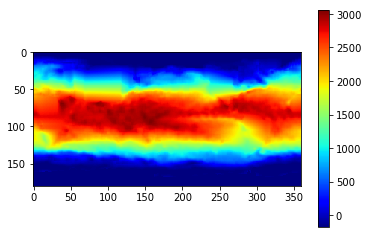

In [154]:
x = dsst[0]
plt.imshow(x,cmap='jet')
plt.colorbar()
plt.show()

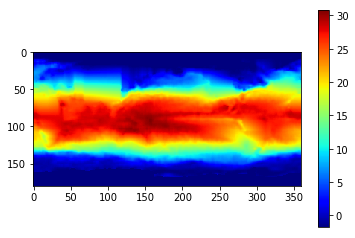

In [156]:
plt.imshow(sst[0,:,:],cmap='jet')
plt.colorbar()
plt.show()

In [158]:
# comparing both 
im = sst[0]
print(x.shape, im.shape)
print(x.dtype, im.dtype)
print(x.min(), x.max())
print(im.min(), im.max())

(180, 360) (180, 360)
>i2 float32
-180 3059
-1.79 30.84


[-180. -180. -180. -180. -180. -180. -180. -180. -180. -180. -180. -180.
 -180. -180. -180. -180. -180. -180. -180. -180. -180. -180. -180. -180.
 -180. -180. -180. -180. -180. -180. -180. -180. -180. -180. -180. -180.
 -180. -180. -180. -180. -180. -180. -180. -180. -180. -180. -180. -180.
 -180. -180. -180. -180. -180. -180. -180. -180. -180. -180. -180. -180.
 -180. -180. -180. -180. -180. -180. -180. -180. -180. -180. -180. -180.
 -180. -180. -180. -180. -180. -180. -180. -180. -180. -180. -180. -180.
 -180. -180. -180. -180. -180. -180. -180. -180. -180. -180. -180. -180.
 -180. -180. -180. -180. -180. -180. -180. -180. -180. -180. -180. -180.
 -180. -180. -180. -180. -180. -180. -180. -180. -180. -180. -180. -180.
 -180. -180. -180. -180. -180. -180. -180. -180. -180. -180. -180. -180.
 -180. -180. -180. -180. -180. -180. -180. -180. -180. -180. -180. -180.
 -180. -180. -180. -180. -180. -180. -180. -180. -180. -180. -180. -180.
 -180. -180. -180. -180. -180. -180. -180. -180. -1